# Homework 6

TFCB 2023

Due date: Nov 16, 2023

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [28]:
library(tidyverse)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`

[link](https://builtin.com/data-science/and-in-r)

this is the NOT operator, which gives you the opposite logical value of the input.

2. `is.na`

[link](https://www.educative.io/answers/what-is-isna-function-in-r)

this function tells you whether values in a dataframe are NA or not (boolean output)

3. `is.numeric`

[link](https://www.educative.io/answers/what-is-the-isnumeric-function-in-r)

this function tells you whether the argument is a numerical value or not (boolean output)

4. `anti_join`

[link](https://www.zevross.com/blog/2014/08/05/using-the-r-function-anti_join-to-find-unmatched-records/)

this function allows you to find which rows are different between two dataframes

5. `desc`

[link](https://dplyr.tidyverse.org/reference/desc.html)

this dlpyr function transforms a vector to a sorted version of it in descending order

6. `dplyr::slice`

[link](https://dplyr.tidyverse.org/reference/slice.html)

this function allows you to make a new dataframe from an older one with just the rows you want

7. `dplyr::across`

[link](https://www.statology.org/dplyr-across/)

this function allows the same transformation (like mutate(), etc) to be applied to multiple columns

## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [2]:

#this line reads the list of gene names and their ensembl IDs as tab separated values
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%

  #keeps only select columns in the table
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%

  #only keeps values that are not NA
  filter(!is.na(ccds_id)) %>%

  #prints the table
  print()

Rows: 19255 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, inter...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,854 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [29]:
#reads in some zipped RNA sequencing data 
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%

  #change the name of the ensembl_gene_id column; however this doesn't actually change the column name since it's in quotes
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%

  #print the table
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_sum).”


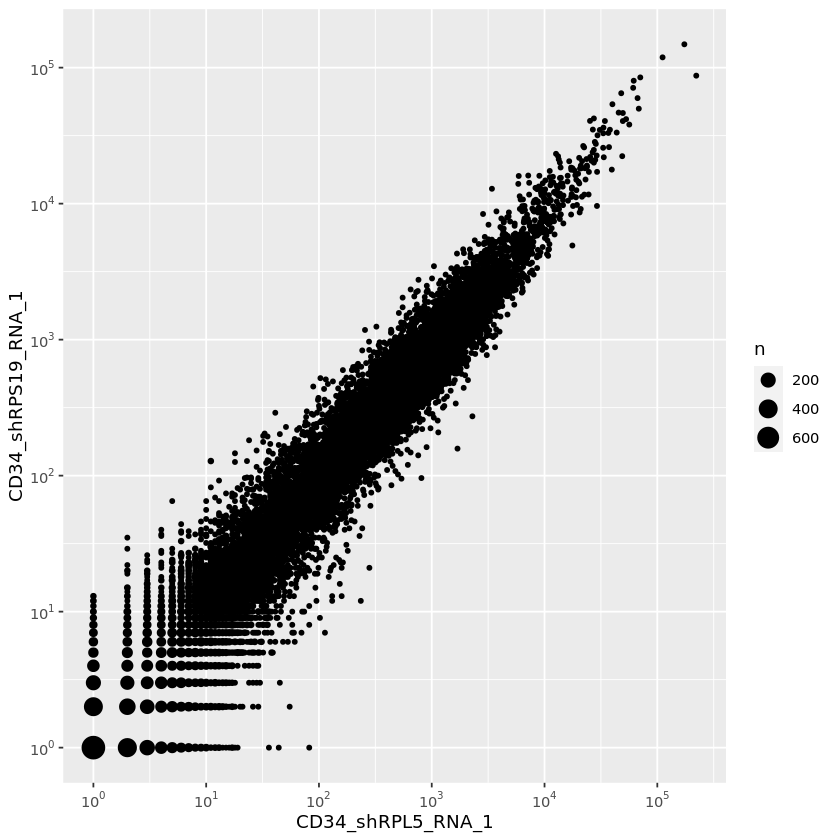

In [30]:

library(scales)

data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  geom_count() + 
  scale_y_continuous(trans='log10',breaks=trans_breaks('log10', function(x) 10^x),labels=trans_format('log10', math_format(10^.x))) + 
  scale_x_continuous(trans='log10',breaks=trans_breaks('log10', function(x) 10^x),labels=trans_format('log10', math_format(10^.x)))




**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [31]:
#check what the dataframe looks like initially
print(colnames(data))

#select the right columns
data <- select(data, ensembl_gene_id, matches("RPL5"),matches("RPS19"),matches("Luc"))

#different way of doing it that I figured out with grep
#data <- select(data, ensembl_gene_id, grep("RPL5",colnames(data)),grep("RPS19",colnames(data)),grep("Luc",colnames(data)))


#check the outputs
print(colnames(data))


 [1] "ensembl_gene_id"    "CD34_shTSR2_RNA_1"  "CD34_shTSR2_RNA_2" 
 [4] "CD34_shRPL5_RNA_1"  "CD34_shRPL5_RNA_2"  "CD34_shRPL5_RPF_1" 
 [7] "CD34_shRPL5_RPF_2"  "CD34_shRPS19_RNA_1" "CD34_shRPS19_RNA_2"
[10] "CD34_shRPS19_RPF_1" "CD34_shRPS19_RPF_2" "CD34_shLuc_RNA_1"  
[13] "CD34_shLuc_RNA_2"   "CD34_shLuc_RPF_1"   "CD34_shLuc_RPF_2"  
 [1] "ensembl_gene_id"    "CD34_shRPL5_RNA_1"  "CD34_shRPL5_RNA_2" 
 [4] "CD34_shRPL5_RPF_1"  "CD34_shRPL5_RPF_2"  "CD34_shRPS19_RNA_1"
 [7] "CD34_shRPS19_RNA_2" "CD34_shRPS19_RPF_1" "CD34_shRPS19_RPF_2"
[10] "CD34_shLuc_RNA_1"   "CD34_shLuc_RNA_2"   "CD34_shLuc_RPF_1"  
[13] "CD34_shLuc_RPF_2"  


## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [32]:


#check all columns that start with CD34, which is all the numeric ones
#filter so that no rows with any value less than 50 is included
data <- data %>% 
filter(across(starts_with('CD34'),  ~ .x > 50))

#check output
head(data,25)


Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000001036,1487,936,182,295,800,752,148,136,913,854,189,183
ENSG00000001084,1036,1224,134,275,558,817,169,95,1479,1656,220,174
ENSG00000001497,1436,1231,253,367,885,1016,195,137,1647,2118,594,392
ENSG00000002549,1228,1186,285,447,693,897,260,229,1537,1668,459,272
ENSG00000002586,2746,1600,260,395,2570,1989,379,258,819,811,166,112
ENSG00000002834,4346,3800,254,412,5365,5197,434,271,3517,4158,344,248
ENSG00000003056,1379,1661,321,698,1649,2428,708,552,2625,2959,483,359
ENSG00000003393,832,690,84,130,1015,1258,204,238,1178,1149,89,70


## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [36]:

data <- data %>%

#divide each value by their column median
mutate(across(starts_with('CD34'), ~ .x / median(.x),)) 
  
#check output
head(data,25)



ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8110465,0.8271299,0.6121212,0.8861210,0.6721790,0.5947137,1.0392157,0.8364780,0.7652303,0.8154158,0.8593750,0.8520710
ENSG00000001036,1.0806686,0.7741935,1.1030303,1.0498221,0.7782101,0.6625551,0.7254902,0.8553459,0.6783061,0.5774172,0.7382812,1.0828402
ENSG00000001084,0.7529070,1.0124069,0.8121212,0.9786477,0.5428016,0.7198238,0.8284314,0.5974843,1.0988113,1.1196755,0.8593750,1.0295858
ENSG00000001497,1.0436047,1.0181969,1.5333333,1.3060498,0.8608949,0.8951542,0.9558824,0.8616352,1.2236256,1.4320487,2.3203125,2.3195266
ENSG00000002549,0.8924419,0.9809760,1.7272727,1.5907473,0.6741245,0.7903084,1.2745098,1.4402516,1.1419019,1.1277890,1.7929688,1.6094675
ENSG00000002586,1.9956395,1.3234078,1.5757576,1.4056940,2.5000000,1.7524229,1.8578431,1.6226415,0.6084695,0.5483435,0.6484375,0.6627219
ENSG00000002834,3.1584302,3.1430935,1.5393939,1.4661922,5.2188716,4.5788546,2.1274510,1.7044025,2.6129272,2.8113590,1.3437500,1.4674556
ENSG00000003056,1.0021802,1.3738627,1.9454545,2.4839858,1.6040856,2.1392070,3.4705882,3.4716981,1.9502229,2.0006761,1.8867188,2.1242604
ENSG00000003393,0.6046512,0.5707196,0.5090909,0.4626335,0.9873541,1.1083700,1.0000000,1.4968553,0.8751857,0.7768763,0.3476562,0.4142012


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [37]:
#errors: 
# 1. some column names were typos
# 2. select() function didn't incorporate mean_shluc_te
# 3. the last mutate() line had == instead of =
# 4. all the parentheses were screwed up

lfc <- data %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te))


head(data)
head(lfc)



ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8110465,0.8271299,0.6121212,0.8861210,0.6721790,0.5947137,1.0392157,0.8364780,0.7652303,0.8154158,0.8593750,0.8520710
ENSG00000001036,1.0806686,0.7741935,1.1030303,1.0498221,0.7782101,0.6625551,0.7254902,0.8553459,0.6783061,0.5774172,0.7382812,1.0828402
ENSG00000001084,0.7529070,1.0124069,0.8121212,0.9786477,0.5428016,0.7198238,0.8284314,0.5974843,1.0988113,1.1196755,0.8593750,1.0295858
ENSG00000001497,1.0436047,1.0181969,1.5333333,1.3060498,0.8608949,0.8951542,0.9558824,0.8616352,1.2236256,1.4320487,2.3203125,2.3195266
ENSG00000002549,0.8924419,0.9809760,1.7272727,1.5907473,0.6741245,0.7903084,1.2745098,1.4402516,1.1419019,1.1277890,1.7929688,1.6094675
ENSG00000002586,1.9956395,1.3234078,1.5757576,1.4056940,2.5000000,1.7524229,1.8578431,1.6226415,0.6084695,0.5483435,0.6484375,0.6627219


ensembl_gene_id,mean_rpl5_te,mean_rps19_te,mean_shluc_te,lfc_te_rpl5,lfc_te_rps19
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.9145793,1.480547,1.0827509,-0.2435212,0.4514286
ENSG00000001036,1.1606536,1.097220,1.4502570,-0.3213712,-0.4024560
ENSG00000001084,1.0144195,1.129326,0.8514636,0.2526376,0.4074452
ENSG00000001497,1.3771370,1.035004,1.7471417,-0.3433245,-0.7553605
ENSG00000002549,1.7711052,1.853797,1.4990746,0.2405776,0.3064111
ENSG00000002586,0.8982853,0.818471,1.1334238,-0.3354417,-0.4696843


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [38]:
mean_lfc <- lfc %>%
mutate(avg_lfc = ((lfc_te_rpl5 + lfc_te_rps19)/2)) %>%
select(ensembl_gene_id, avg_lfc)

head(mean_lfc,25)

ensembl_gene_id,avg_lfc
<chr>,<dbl>
ENSG00000000419,0.10395371
ENSG00000001036,-0.36191361
ENSG00000001084,0.33004139
ENSG00000001497,-0.54934250
ENSG00000002549,0.27349437
ENSG00000002586,-0.40256298
ENSG00000002834,-0.26298514
ENSG00000003056,0.87305979
ENSG00000003393,1.10575815



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [39]:
mean_lfc <- mean_lfc %>%
inner_join(annotations, 'ensembl_gene_id')


ensembl_gene_id,avg_lfc,symbol,name,gene_group,ccds_id
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ENSG00000000419,0.10395371,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",Glycosyltransferase family 2|Dolichyl-phosphate mannosyltransferase subunits,CCDS13434|CCDS93059|CCDS82628
ENSG00000001036,-0.36191361,FUCA2,alpha-L-fucosidase 2,Alpha-L-fucosidases,CCDS5200
ENSG00000001084,0.33004139,GCLC,glutamate-cysteine ligase catalytic subunit,NA,CCDS4952|CCDS75471
ENSG00000001497,-0.54934250,LAS1L,LAS1 like ribosome biogenesis factor,Large ribosomal subunit biogenesis complex,CCDS55433|CCDS94622|CCDS94620|CCDS94621|CCDS14381|CCDS55434
ENSG00000002549,0.27349437,LAP3,leucine aminopeptidase 3,Aminopeptidases,CCDS3422
ENSG00000002586,-0.40256298,CD99,CD99 molecule (Xg blood group),Blood group antigens|CD molecules|Pseudoautosomal region 1,CCDS75947|CCDS83452|CCDS48071|CCDS14119
ENSG00000002834,-0.26298514,LASP1,LIM and SH3 protein 1,LIM domain containing|MicroRNA protein coding host genes|Nebulin family,CCDS11331|CCDS62164
ENSG00000003056,0.87305979,M6PR,"mannose-6-phosphate receptor, cation dependent",MRH domain containing,CCDS8598|CCDS73440
ENSG00000003393,1.10575815,ALS2,alsin Rho guanine nucleotide exchange factor ALS2,Dbl family Rho GEFs|VPS9 domain containing,CCDS46492|CCDS42800|CCDS92925


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

# A tibble: 10 × 3
   symbol name                                       avg_lfc
   <chr>  <chr>                                        <dbl>
 1 RPL7A  ribosomal protein L7a                        -1.69
 2 APOE   apolipoprotein E                             -1.69
 3 RPS26  ribosomal protein S26                        -1.85
 4 H2AX   H2A.X variant histone                        -1.87
 5 RPLP1  ribosomal protein lateral stalk subunit P1   -2.02
 6 RPL18A ribosomal protein L18a                       -2.02
 7 COX8A  cytochrome c oxidase subunit 8A              -2.03
 8 RPS15  ribosomal protein S15                        -2.28
 9 H2BC12 H2B clustered histone 12                     -2.80
10 H2AC6  H2A clustered histone 6                      -2.96


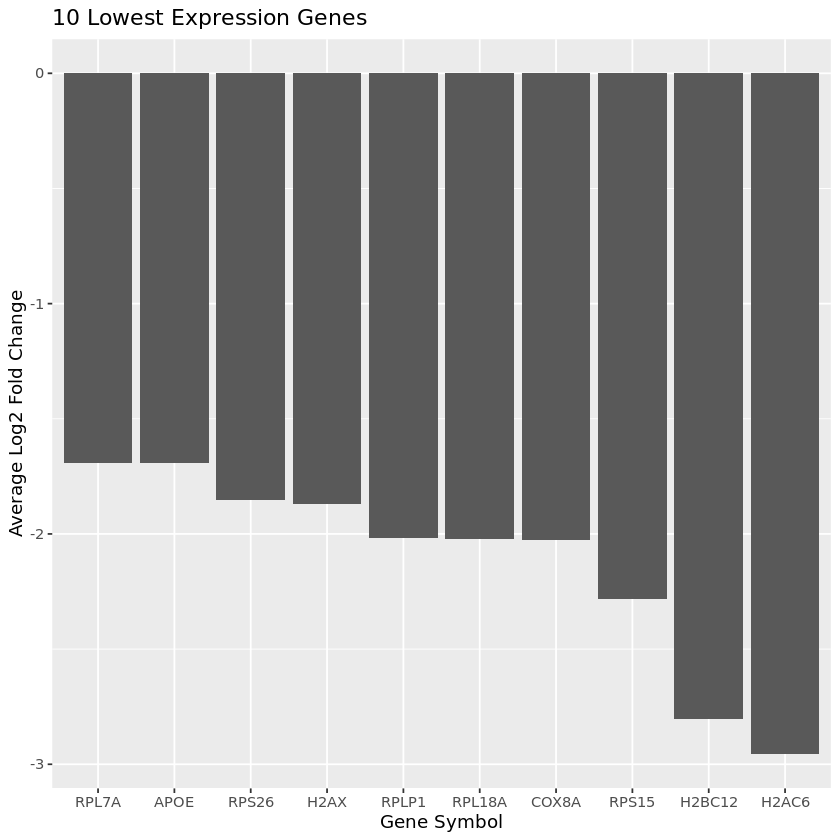

In [62]:
lowest10lfc <- mean_lfc %>%
select(symbol, name, avg_lfc) %>%
arrange(desc(avg_lfc)) %>%
tail(10) %>%
print()


lowest10lfc %>%
ggplot(aes(x = reorder(symbol, -avg_lfc), y = avg_lfc)) +
  geom_col() + xlab('Gene Symbol') + ylab('Average Log2 Fold Change') + 
  ggtitle("10 Lowest Expression Genes ")

# here, I chose to make a bar plot. This makes it easier to see each value rather than a point.
# According to the instructions, each gene only has one quantitative value, the avg_lfc.
# I also chose to represent gene symbol, not name, on the X axis to make it easier to read.
# I then sorted the X axis to make it obvious that the right-most genes have the lowest log fold change.
